<a href="https://colab.research.google.com/github/Juanmagithb/bendigo/blob/main/SegundaEntrega%2BAlegre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

**Contexto comercial**

Gran parte de la actividad economica en Bendigo se debe la extranccion de minerales.
Es por esto que el clima es un factor crítico que puede afectar directamente la producción y los costos de la operación minera. Las condiciones climáticas, como las lluvias, la nieve, el viento, la temperatura y la humedad, pueden afectar la seguridad de los trabajadores, la calidad del mineral extraído y la eficiencia de los procesos de producción.

Un sistema predictivo del clima en una economía minera como la Bendigo tendría un contexto comercial muy importante, ya que podría proporcionar información precisa y oportuna sobre las condiciones climáticas futuras, lo que permitiría a las empresas mineras tomar decisiones informadas sobre sus operaciones. Algunas aplicaciones comerciales de un sistema predictivo del clima en una economía minera podrían incluir:


*   **Planificación de operaciones mineras:** Un sistema predictivo del clima podría ayudar a las empresas mineras a planificar sus operaciones con anticipación, lo que les permitiría ajustar su producción y sus procesos para adaptarse a las condiciones climáticas previstas. Por ejemplo, si se pronostica una tormenta de nieve, la empresa podría reducir su producción para evitar que se acumule nieve en los caminos y reducir el riesgo de accidentes.

*   **Gestión de riesgos:** Las condiciones climáticas extremas pueden aumentar los riesgos para los trabajadores y la infraestructura de la mina. Un sistema predictivo del clima podría ayudar a las empresas a identificar y gestionar estos riesgos, permitiendo la evacuación de los trabajadores en caso de una tormenta o la preparación de equipos para soportar condiciones climáticas adversas.

*   **Optimización de costos:** Al tener información precisa sobre las condiciones climáticas futuras, las empresas mineras podrían optimizar sus costos de producción al planificar mejor la programación de sus operaciones y minimizar los costos asociados con el clima, como el mantenimiento de carreteras y el consumo de energía.

**Problema comercial**

Debemos dar respuestas a la siguientes preguntas:

*   ¿En que epoca del año es probable que se interrupan las actividades por lluvia?

*   ¿En que epoca del año se deben tomar mayores precauciones frente a las nevadas?

*   ¿Las temperaturas permiten que las actividades se realicen de forma optima?

**Contexto Analitico**

Variables de interes:

*   Moth: Mes
*   Year : Año
*   MinTemp : Temperatura minima en °C
*   MaxTemp : Temperatura maxima en °C
*   Rainfall : Lluvia en mm
*   Humidity9am : % de humedad a las 9am
*   Humidity3pm : % de humedad a las 3pm
*   Pressure9am : Presion atmosferica a las 9am en hPa
*   Pressure3pm : Presion atmosferica a las 3am en hPa
*   Temp9am : Temperatura a las 9am en °C
*   Temp3pm : Temperatura a las 3pm en °C
*   RainToday : Se verifica lluvia en el dia
*   RainTomorrow : Se verifica lluvia el dia siguiente

# Setup

In [7]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import numpy as np
import requests
import json

**Conexion con google drive**

In [4]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
bendigo_weather = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Bendigo_weather.xlsx')

# EDA + Data Wrangling

**Control de duplicados**

In [ ]:
bendigo_weather["Date"].duplicated().sum()

0

Se verifica que no hay registros duplicados


---


**Feature selection #1**

In [ ]:
bendigo_weather.drop(['Location' , 'Evaporation', 'Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Cloud9am','Cloud3pm'],axis = 1, inplace = True)

Dejamos unicamente las variables necesarias para el Storytelling

---

**Analisis de datos nulos**

In [ ]:
bendigo_weather.isnull().sum()

Date             0
Day              0
Moth             0
Year             0
MinTemp          2
MaxTemp          5
Rainfall         6
Humidity9am      7
Humidity3pm      2
Pressure9am     15
Pressure3pm     10
Temp9am          3
Temp3pm          2
RainToday        6
RainTomorrow     6
dtype: int64

Por fortuna tenemos muy pocos casos nulos que no suponen una cantidad representativa respecto al df, es por esto que se decide eliminar los mismos para agilizar el proceso y evitar posibles outliers.

In [ ]:
bendigo_weather.dropna(subset=[ 'MinTemp','MaxTemp','Rainfall','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am', 'Temp3pm','RainToday','RainTomorrow' ], inplace = True)

Se perdieron el proceso de depuracion 31 filas de datos, que representan un  %1 del df original.



---

**Analisis circustancial**

En el caso de el dato **Rainfall** que representa la cantidad de lluvia registrada de forma diaria, no tiene sentido que este dato tenga un valor superior a 0 si el valor de **RainToday** es igual a "No".
Procedemos a depurar quellos casos que no cumplan con las condiciones antes mencionadas.

In [ ]:
rain_today_no = bendigo_weather[bendigo_weather.RainToday == "No"]
rain_today_no.Rainfall.unique()

array([0. , 0.2, 0.8, 0.4, 1. , 0.6])

En los todos los casos no se supero el 1mm de precipitacion registrada.

In [ ]:
rain_today_no = rain_today_no[rain_today_no.Rainfall > 0]
rain_today_no

,Date,Day,Moth,Year,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4,2008-12-05,5,december,2008,15.1,30.3,0.2,68.0,29.0,1008.0,1005.0,21.3,29.2,No,No
5,2008-12-06,6,december,2008,9.9,27.2,0.2,60.0,29.0,1010.0,1005.6,18.0,26.2,No,No
6,2008-12-07,7,december,2008,8.0,22.0,0.2,47.0,26.0,1012.4,1010.7,13.1,20.4,No,No
10,2008-12-11,11,december,2008,8.7,28.7,0.2,43.0,13.0,1012.8,1009.7,16.8,26.3,No,No
26,2008-12-27,27,december,2008,17.5,32.1,0.2,70.0,32.0,1006.8,1002.3,21.1,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,2017-06-13,13,june,2017,1.4,15.7,0.2,99.0,61.0,1031.3,1029.1,6.2,15.2,No,No
3028,2017-06-14,14,june,2017,1.9,15.2,0.2,99.0,65.0,1030.8,1027.9,6.1,14.4,No,No
3030,2017-06-16,16,june,2017,3.3,13.8,0.2,99.0,77.0,1026.4,1024.1,5.9,13.2,No,No
3034,2017-06-20,20,june,2017,-0.3,14.1,0.2,98.0,64.0,1029.4,1026.1,4.5,13.5,No,No


Se verifican entonces 522 casos que no cumplen con la condicion, debemos entonces imputar con un 0 los valores de **Rainfall** en estos casos.

Para eso utilizamos el siguiente codigo:

In [ ]:
bendigo_weather.loc[bendigo_weather['RainToday'] == 'No', 'Rainfall'] = 0

Queda solucionada la desviacion que reportaba lluvias los dias que no se detectaron precipitaciones.


---

# Insights

## ¿En que epoca del año es probable que se interrupan las actividades de mineria por lluvia en Bendingo?

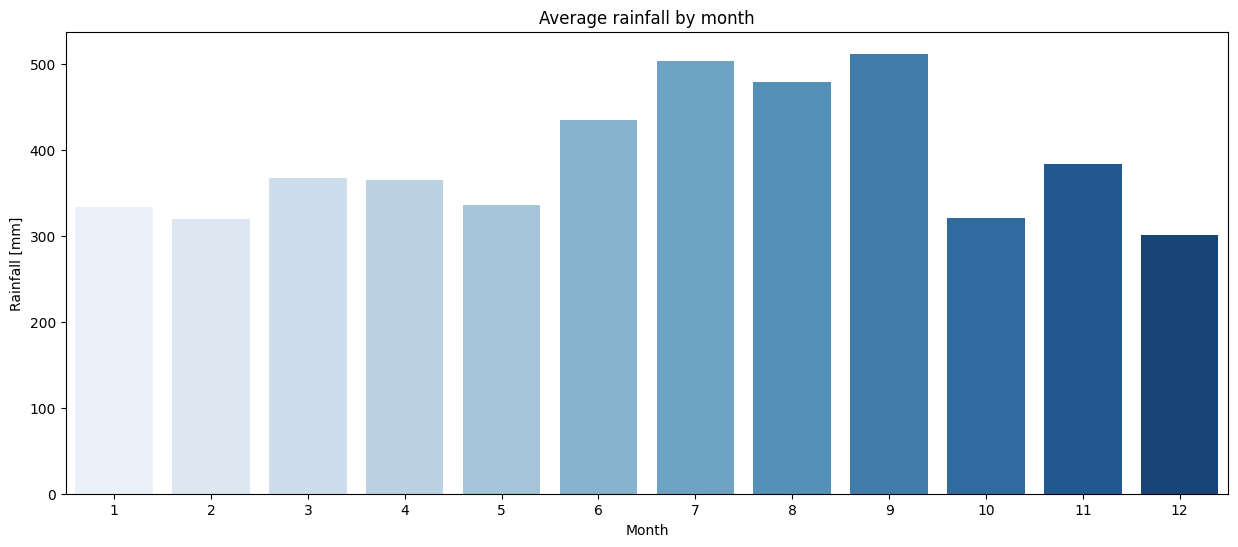

In [ ]:
bendigo_weather["month_num"] = bendigo_weather["Moth"].apply(lambda x: list(calendar.month_name).index(x.title()))

bendigo = bendigo_weather.sort_values("month_num")

rainfall_sum_by_month = bendigo.groupby('month_num')['Rainfall'].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(data=rainfall_sum_by_month, x='month_num', y= "Rainfall" , palette = "Blues" )
plt.title('Average rainfall by month')
plt.xlabel('Month')
plt.ylabel('Rainfall [mm]')
plt.show()

La temporada de mayor indice de lluvias en Bendigo se da entre mayo y octubre.
Por lo que durante ese periodo se deben tomar mayores precauciones por lluvias intensas durante las actividades mineria.



---


## ¿En que epoca del año se deben tomar mayores precauciones frente a las nevadas?

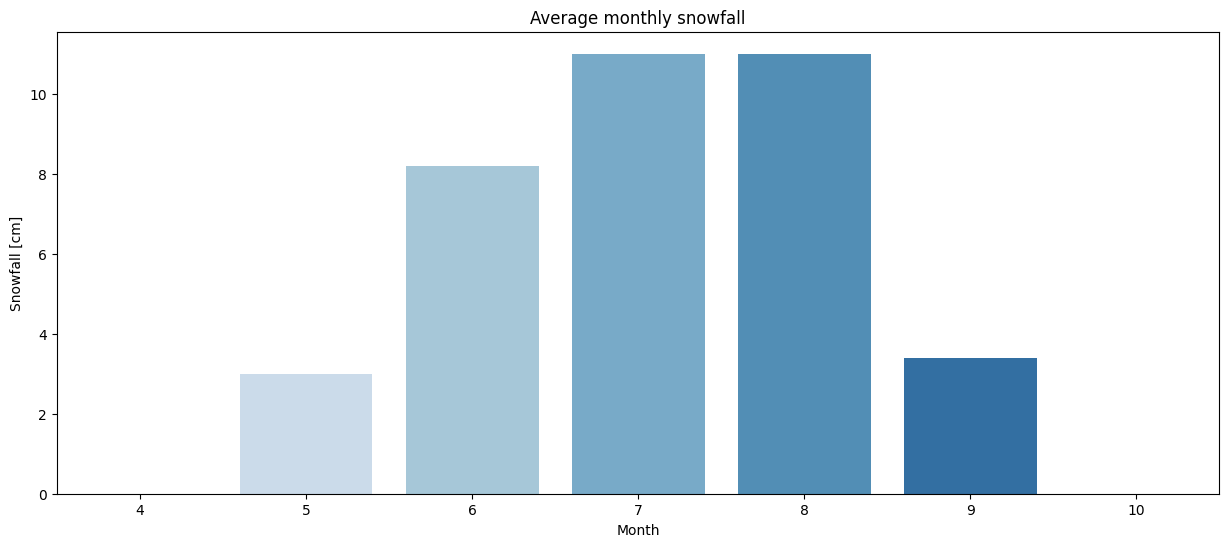

In [ ]:
bendigo_snow = bendigo[bendigo.MinTemp <0 ]

snowfall_sum_by_month = bendigo_snow.groupby('month_num')['Rainfall'].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(data=snowfall_sum_by_month, x='month_num', y= "Rainfall" , palette = "Blues")
plt.title('Average monthly snowfall')
plt.xlabel('Month')
plt.ylabel('Snowfall [cm]')
plt.show()

La acumulación de nieve y el riesgo de avalanchas pueden dificultar el acceso a las áreas de trabajo y aumentar los peligros para la seguridad, por lo que durante estos periodos se deben tomar mayores precauciones por nevadas intensas durante las actividades mineria.


---


## ¿Las temperaturas permiten que las actividades se relicen de forma optima?

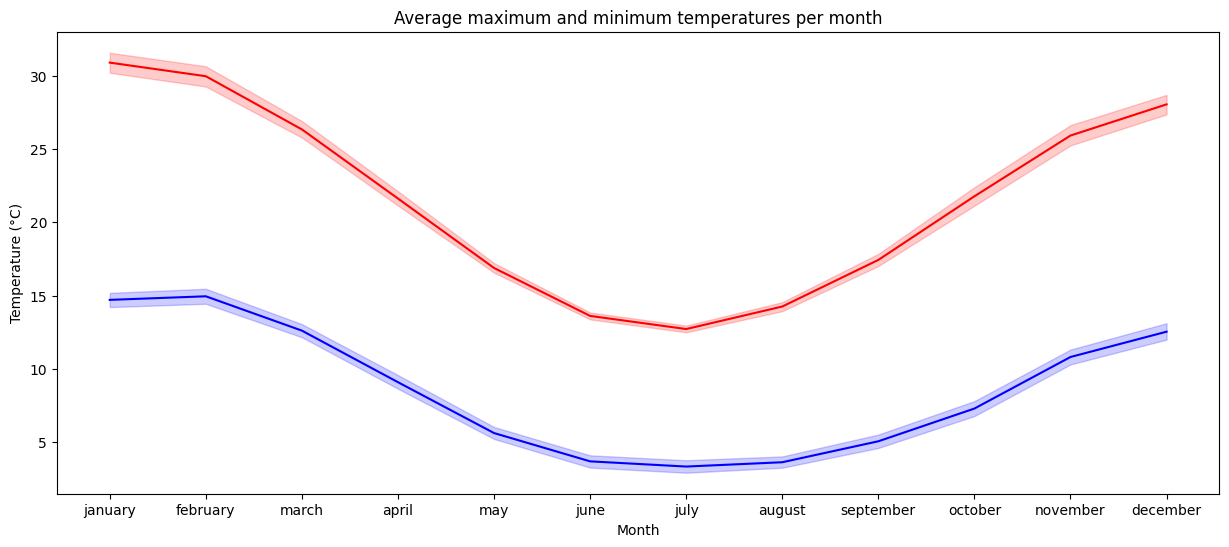

In [ ]:
temp_max = bendigo.MaxTemp
temp_min = bendigo.MinTemp

plt.figure(figsize=(15,6))
sns.lineplot(data=bendigo, x='Moth', y = temp_max , color ="red" )
sns.lineplot(data=bendigo, x='Moth', y = temp_min , color ="blue" )
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Average maximum and minimum temperatures per month')
plt.show()

La elección entre una baja o alta temperatura en una actividad minera depende de varios factores y consideraciones específicas. No hay una respuesta única o generalizada, ya que las condiciones y requerimientos pueden variar según la ubicación geográfica, el tipo de mineral, el proceso de extracción, entre otros aspectos. Aquí hay algunas consideraciones relevantes:


**Baja temperatura:**

Ventajas:

*   Puede facilitar el enfriamiento de los equipos y maquinaria utilizados en la minería.
*   Puede contribuir a un ambiente de trabajo más cómodo y seguro para los trabajadores.
*   Puede reducir el riesgo de sobrecalentamiento y fallas en los equipos.


Desventajas:

*   Puede aumentar la viscosidad de algunos fluidos utilizados en los procesos mineros.
*   Puede requerir medidas adicionales para prevenir la congelación de agua y otros líquidos.
*   Puede implicar desafíos logísticos y de infraestructura en áreas con temperaturas extremadamente bajas.


**Alta temperatura:**

Ventajas:

*   Puede ayudar a mantener la fluidez de algunos fluidos utilizados en los procesos mineros.
*   Puede permitir la operación más eficiente de ciertos equipos y maquinaria.
*   Puede facilitar la evaporación de líquidos y el secado de minerales en algunos procesos.

Desventajas:

*   Puede aumentar el estrés térmico en los trabajadores y requerir medidas adicionales de seguridad y protección.
*   Puede aumentar el consumo de energía necesario para enfriar y ventilar los espacios de trabajo.
*   Puede aumentar el riesgo de incendios y explosiones en ciertas condiciones.

# Comprobacion de Insights mediante API

## Obtencion de datos de la API

Fuente: https://openweathermap.org

Codigo de ifentificacion de la ciudad de Bendigo - > ID: 2176187

Fuente: http://bulk.openweathermap.org/sample/

In [1]:
user_key=""

**Datos de climaticos**

Fuente: https://openweathermap.org/api/statistics-api

Debido a la imposibilidad de obtener datos históricos del clima, se utiliza la siguiente API que proporciona indicadores climáticos estadísticos basados en registros históricos obtenidos en los últimos +40 años.

De esta forma la función de la API será comparar los insight obtenidos con el dataset origen con los proporcionados por el análisis de los datos de la API.

In [8]:
id = 2176187
url = f"https://history.openweathermap.org/data/2.5/aggregated/year?id={id}&units=metric&appid={user_key}"

response = requests.get(url)
if response.status_code == 200:
  data = response.json()

**Armado del df**

Se utilizan para armar el df los valores medios de cada parametro, salvo en el de precipitaciones que utilizamos el maximo registrado para cada dia.

In [9]:
result_data = data['result']
df_data = []

for day_data in result_data:
    row = {
        'month': day_data['month'],
        'day': day_data['day'],
        'temperature_min': day_data['temp']['average_min'],
        'temperature_med': day_data['temp']['median'],
        'temperature_max': day_data['temp']['average_max'],
        'pressure': day_data['pressure']['median'],
        'humidity': day_data['humidity']['median'],
        'wind': day_data['wind']['median'],
        'precipitation': day_data['precipitation']['max'],
        'clouds': day_data['clouds']['median']
    }
    df_data.append(row)

# Crear el DataFrame
df = pd.DataFrame(df_data)

## Data Wrangling sobre API

**Analisis de datos nulos**

Identificar los datos nulos para cada variable objetivo para tratar los mismos

In [10]:
df.isnull().sum()

month              0
day                0
temperature_min    0
temperature_med    0
temperature_max    0
pressure           0
humidity           0
wind               0
precipitation      0
clouds             0
dtype: int64

Por fortuna tenemos no tenemos datos nulos, esto se debe al control de los datos utilizan los creadores de la API.


---


**Control de duplicados**

La base de datos seleccionada cuenta con registros historicos de lluvia y es importante que no haya elementos de fecha duplicados

In [11]:
df.duplicated(['month', 'day']).sum()

0

No hay registros duplicados para las fechas del df elegido, esto se debe a que la API seleccionada esta restringida a valores estadisticos para cada dia del año.


---


**Cambio de unidades**

Para mantener una coherencia en la información del df se modificaran las unidades de temperatura de grados Kelvin a grados Celsius  

In [12]:
df['temperature_min'] = df['temperature_min'] - 273.15
df['temperature_med'] = df['temperature_med'] - 273.15
df['temperature_max'] = df['temperature_max'] - 273.15



---



**Feature selection**

Eliminar datos irrelevantes del df que no intervinen en el estudio del mismo

In [13]:
df.drop([
    'wind',
    'clouds',
         ],axis = 1, inplace = True)

df = df.reset_index(drop=True)



---



## Insights obtenidos sobre API

### ¿En que epoca del año son mas abundantes las lluvias en Bendingo?

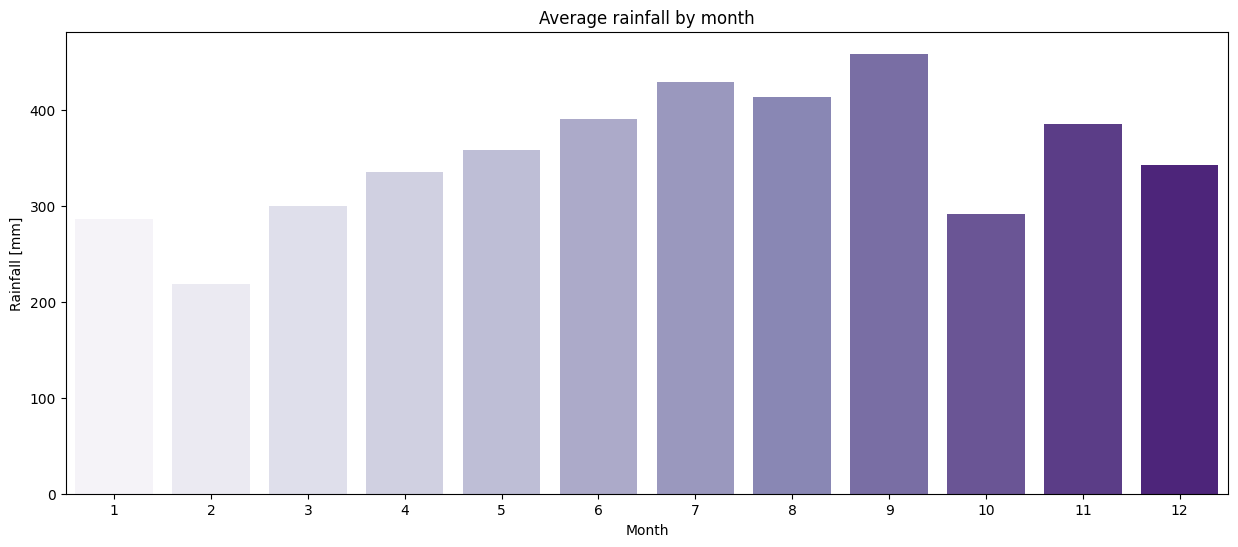

In [15]:
rainfall_sum_by_month = df.groupby('month')['precipitation'].sum().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data=rainfall_sum_by_month, x='month', y= "precipitation" , palette = "Purples" )
plt.title('Average rainfall by month')
plt.xlabel('Month')
plt.ylabel('Rainfall [mm]')
plt.show()

Esquema obtenido mediantes los datos del dataset:

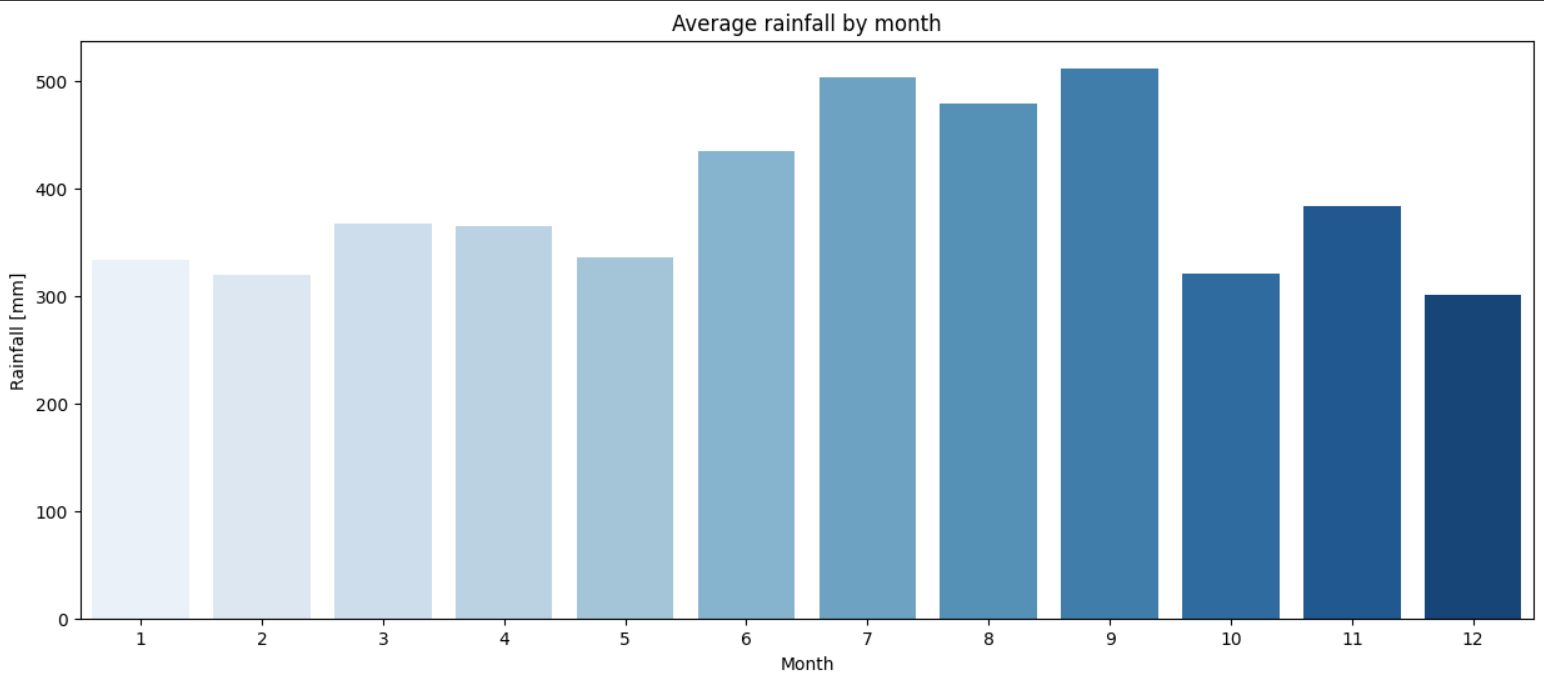

**Se verifica concordancia entre la informacion.**



---



### ¿En que epoca del año son mas abundantes las nevadas en Bendingo?

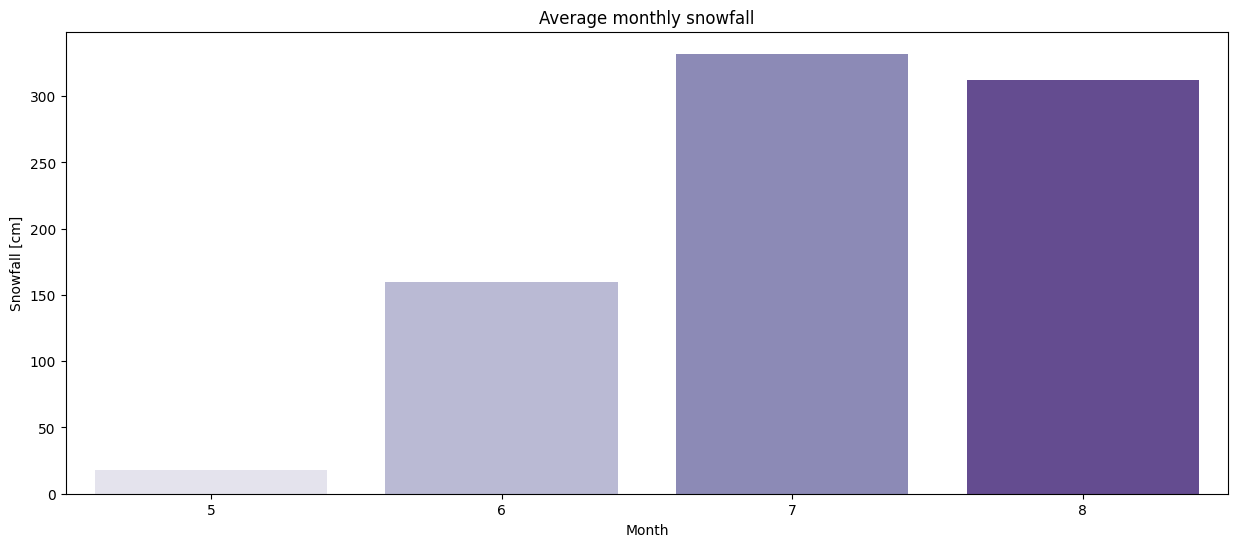

In [16]:
bendigo_snow = df[df.temperature_min <5 ]

snowfall_sum_by_month = bendigo_snow.groupby('month')['precipitation'].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(data=snowfall_sum_by_month, x='month', y= "precipitation" , palette = "Purples")
plt.title('Average monthly snowfall')
plt.xlabel('Month')
plt.ylabel('Snowfall [cm]')
plt.show()

Esquema obtenido mediantes los datos del dataset:

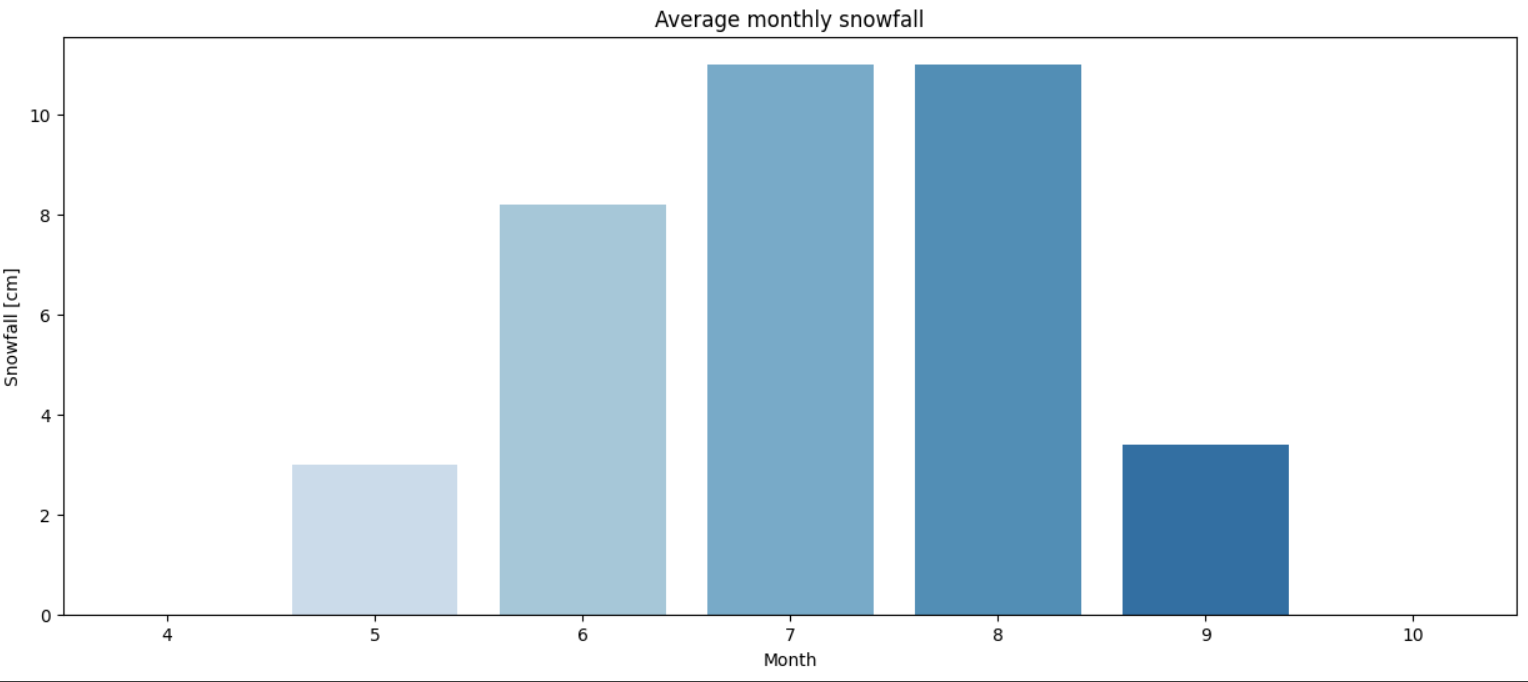

**Se verifica concordancia entre la informacion.**



---



### ¿Como fluctuan las temperaturas duante el año?

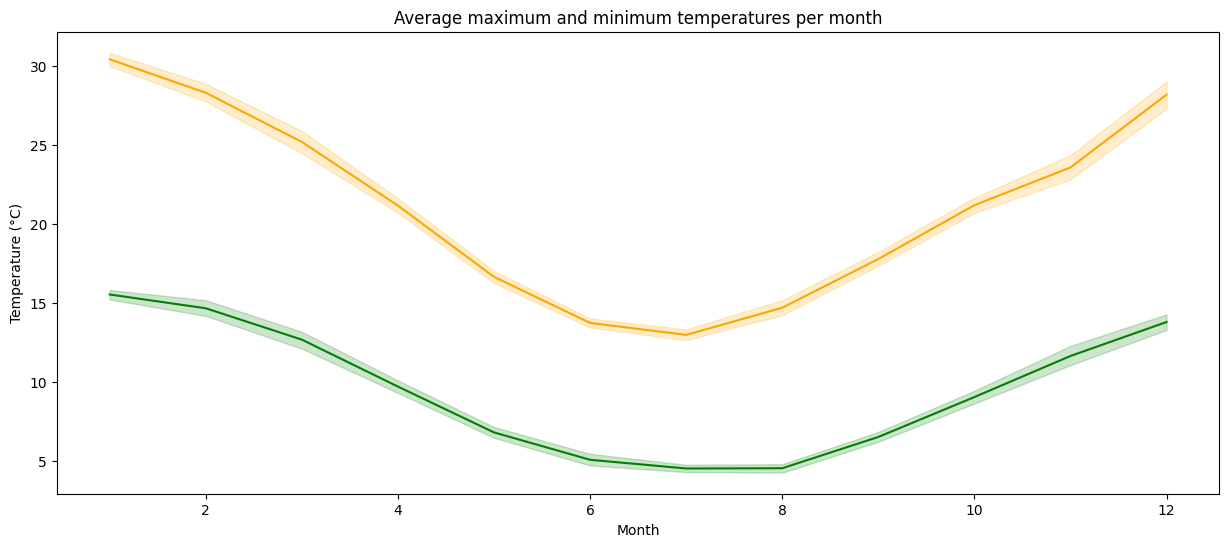

In [17]:
temp_max = df.temperature_max
temp_min = df.temperature_min

plt.figure(figsize=(15,6))
sns.lineplot(data=df, x='month', y = temp_max , color ="orange" )
sns.lineplot(data=df, x='month', y = temp_min , color ="green" )
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Average maximum and minimum temperatures per month')
plt.show()

Esquema obtenido mediantes los datos del dataset:

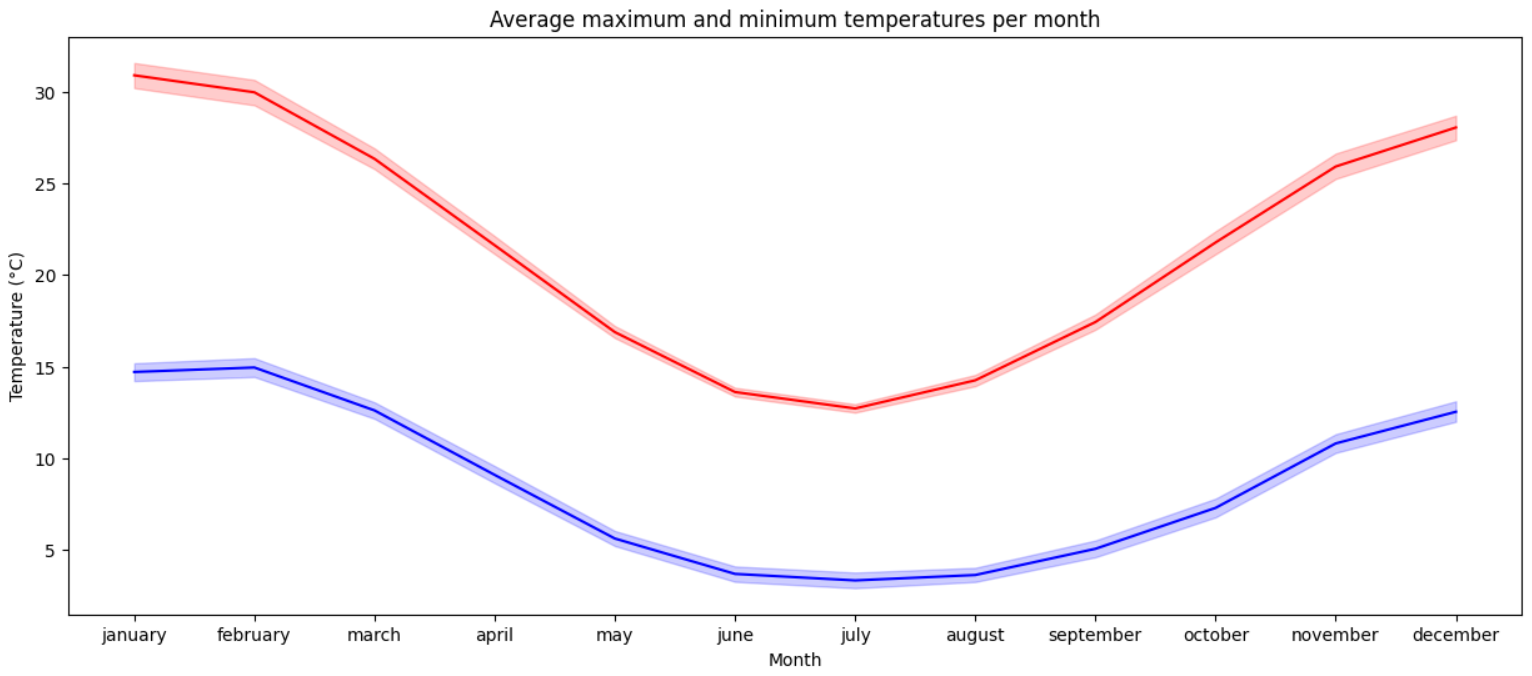

**Se verifica concordancia entre la informacion.**



---



## Conclusiones

La comparación de datos de fuentes múltiples es un componente esencial en el análisis climático. Esta práctica no solo garantiza la precisión y confiabilidad de los datos utilizados, sino que también enriquece nuestra comprensión de las condiciones climáticas al ofrecer perspectivas diversas y complementarias.

Cada fuente puede emplear tecnologías y métodos de recopilación distintos. Al combinar estos enfoques diversos, es más probable que obtengamos una representación más exacta de la situación climática. La convergencia de diferentes métodos reduce la probabilidad de sesgos o errores sistemáticos.

Los visualizaciones realizadas a partir de los datos obtenidos de la API son similares a las realizadas con los datos del dataframe.

Cuando diferentes fuentes coinciden en la identificación de una misma tendencia climática o un evento particular, la probabilidad de que sea una observación válida aumenta significativamente. Esta confirmación cruzada es esencial para tomar decisiones fundamentadas.



---

